# Spy Plane Finder In Python

This Jupyter notebook takes this [R code](https://github.com/BuzzFeedNews/2017-08-spy-plane-finder/) and translates it into Python. It assumes you have the data available in that GitHub repository available to you in the notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
planes = pd.read_csv("../2017-08-spy-plane-finder/data/planes_features.csv")

In [3]:
planes.head()

,adshex,duration1,duration2,duration3,duration4,duration5,boxes1,boxes2,boxes3,boxes4,...,steer3,steer4,steer5,steer6,steer7,steer8,flights,squawk_1,observations,type
0,A,0.120253,0.075949,0.183544,0.335443,0.284810,0.088608,0.044304,0.069620,0.120253,...,0.270550,0.344090,0.097317,0.186651,0.011379,0.009426,158,0,11776,GRND
1,A00000,0.211735,0.155612,0.181122,0.198980,0.252551,0.204082,0.183673,0.168367,0.173469,...,0.240732,0.356314,0.116116,0.159325,0.012828,0.013628,392,0,52465,TBM7
2,A00002,0.517241,0.103448,0.103448,0.103448,0.172414,0.862069,0.137931,0.000000,0.000000,...,0.174954,0.244015,0.034070,0.202578,0.021179,0.068140,29,0,1086,SHIP
3,A00008,0.125000,0.041667,0.208333,0.166667,0.458333,0.125000,0.083333,0.125000,0.166667,...,0.202665,0.380515,0.094669,0.182904,0.014706,0.020221,24,0,2176,PA46
4,A0001E,0.100000,0.200000,0.200000,0.400000,0.100000,0.100000,0.000000,0.100000,0.400000,...,0.249206,0.326984,0.112698,0.206349,0.012698,0.011111,10,1135,630,C56X


In [4]:
planes["type"].value_counts()

type
unknown    2528
C172       1014
SR22        799
BE36        699
C182        693
           ... 
B222          1
A4            1
B427          1
T850          1
TVL4          1
Name: count, Length: 455, dtype: int64

In [5]:
# more on factorize and how it works here: https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
planes["type2"] = pd.factorize(planes['type'])[0]

In [6]:
planes["type2"].value_counts()

type2
10     2528
27     1014
14      799
9       699
30      693
       ... 
189       1
358       1
356       1
355       1
454       1
Name: count, Length: 455, dtype: int64

In [7]:
# load training data and join to the planes_features data
train = pd.read_csv("../2017-08-spy-plane-finder/data/train.csv")

In [8]:
train.head()

,adshex,class
0,A00C4B,surveil
1,A0AB21,surveil
2,A0AE77,surveil
3,A0AE7C,surveil
4,A0C462,surveil


In [9]:
train['class'].value_counts()

class
other      500
surveil     97
Name: count, dtype: int64

In [10]:
planes.shape

(19799, 34)

In [11]:
train_complete = pd.merge(
    train,
    planes,
    how="left",
    on="adshex"
)

In [12]:
train_complete.head()

,adshex,class,duration1,duration2,duration3,duration4,duration5,boxes1,boxes2,boxes3,...,steer4,steer5,steer6,steer7,steer8,flights,squawk_1,observations,type,type2
0,A00C4B,surveil,0.450000,0.125000,0.025000,0.025000,0.375000,0.475000,0.250000,0.250000,...,0.154544,0.033312,0.088024,0.010858,0.010753,40,4414,9486,C182,30
1,A0AB21,surveil,0.523810,0.000000,0.047619,0.095238,0.333333,0.714286,0.095238,0.047619,...,0.309313,0.008007,0.078382,0.021492,0.064054,21,4414,2373,C182,30
2,A0AE77,surveil,0.262295,0.196721,0.081967,0.114754,0.344262,0.639344,0.295082,0.032787,...,0.209981,0.009416,0.037900,0.011064,0.027778,61,4414,8496,T206,71
3,A0AE7C,surveil,0.521739,0.086957,0.043478,0.043478,0.304348,0.565217,0.043478,0.260870,...,0.168305,0.023043,0.086073,0.014007,0.014797,23,4415,8853,T206,71
4,A0C462,surveil,0.250000,0.083333,0.500000,0.083333,0.083333,0.208333,0.041667,0.041667,...,0.478422,0.119605,0.118372,0.006165,0.011097,24,1731,811,P8,198


## Random Forest Model

In [13]:
# Define your features and target
features = ['duration1', 'duration2', 'duration3', 'duration4', 'duration5',
            'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5',
            'speed1', 'speed2', 'speed3', 'speed4', 'speed5',
            'altitude1', 'altitude2', 'altitude3', 'altitude4', 'altitude5',
            'steer1', 'steer2', 'steer3', 'steer4', 'steer5', 'steer6', 'steer7', 'steer8',
            'flights', 'squawk_1', 'observations', 'type2']

In [14]:
X_train = train_complete[features]
y_train = train_complete['class']

In [15]:
# Initialize the model
# the default n_estimators is 100, but Peter used 2000 so that's what we go with here, I think it makes the model prone to overfitting
rf_model = RandomForestClassifier(n_estimators=10, random_state=415, class_weight="balanced")

In [16]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=415)

In [17]:
# Get feature importances and sort them
importances = rf_model.feature_importances_
feature_names = np.array(features)
sorted_idx = np.argsort(importances)

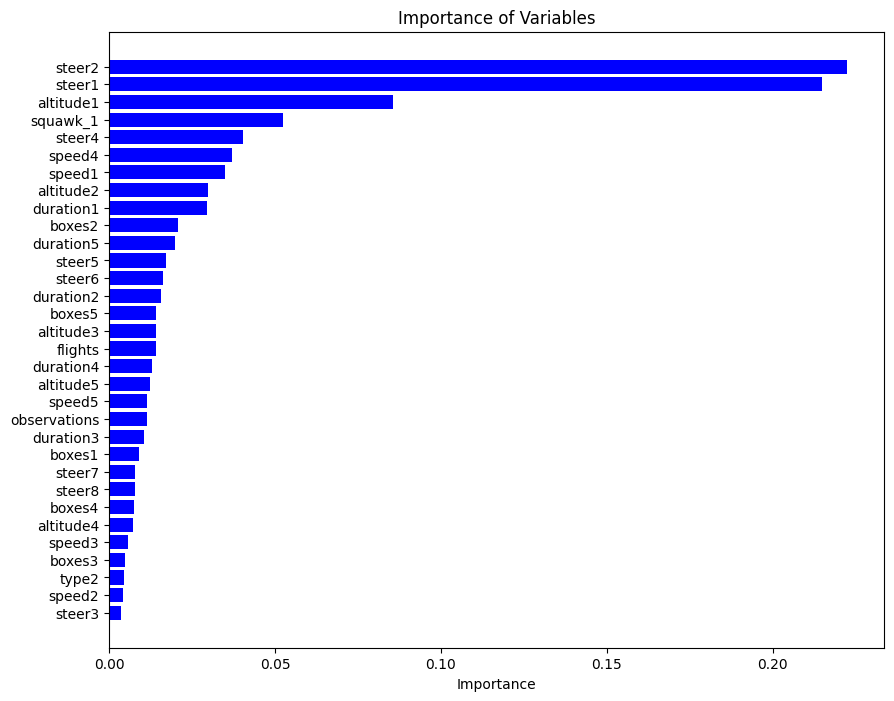

In [18]:
# Plot the importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color="blue")
plt.xlabel("Importance")
plt.title("Importance of Variables")
plt.show()

## How Accurate Is This Model?

Too accurate?

In [19]:
# Predict on the training data
train_preds = rf_model.predict(X_train)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_train, train_preds))
print("\nClassification Report:\n", classification_report(y_train, train_preds))

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       other       1.00      1.00      1.00       500
     surveil       1.00      1.00      1.00        97

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597



## Let's Visualize The Trees

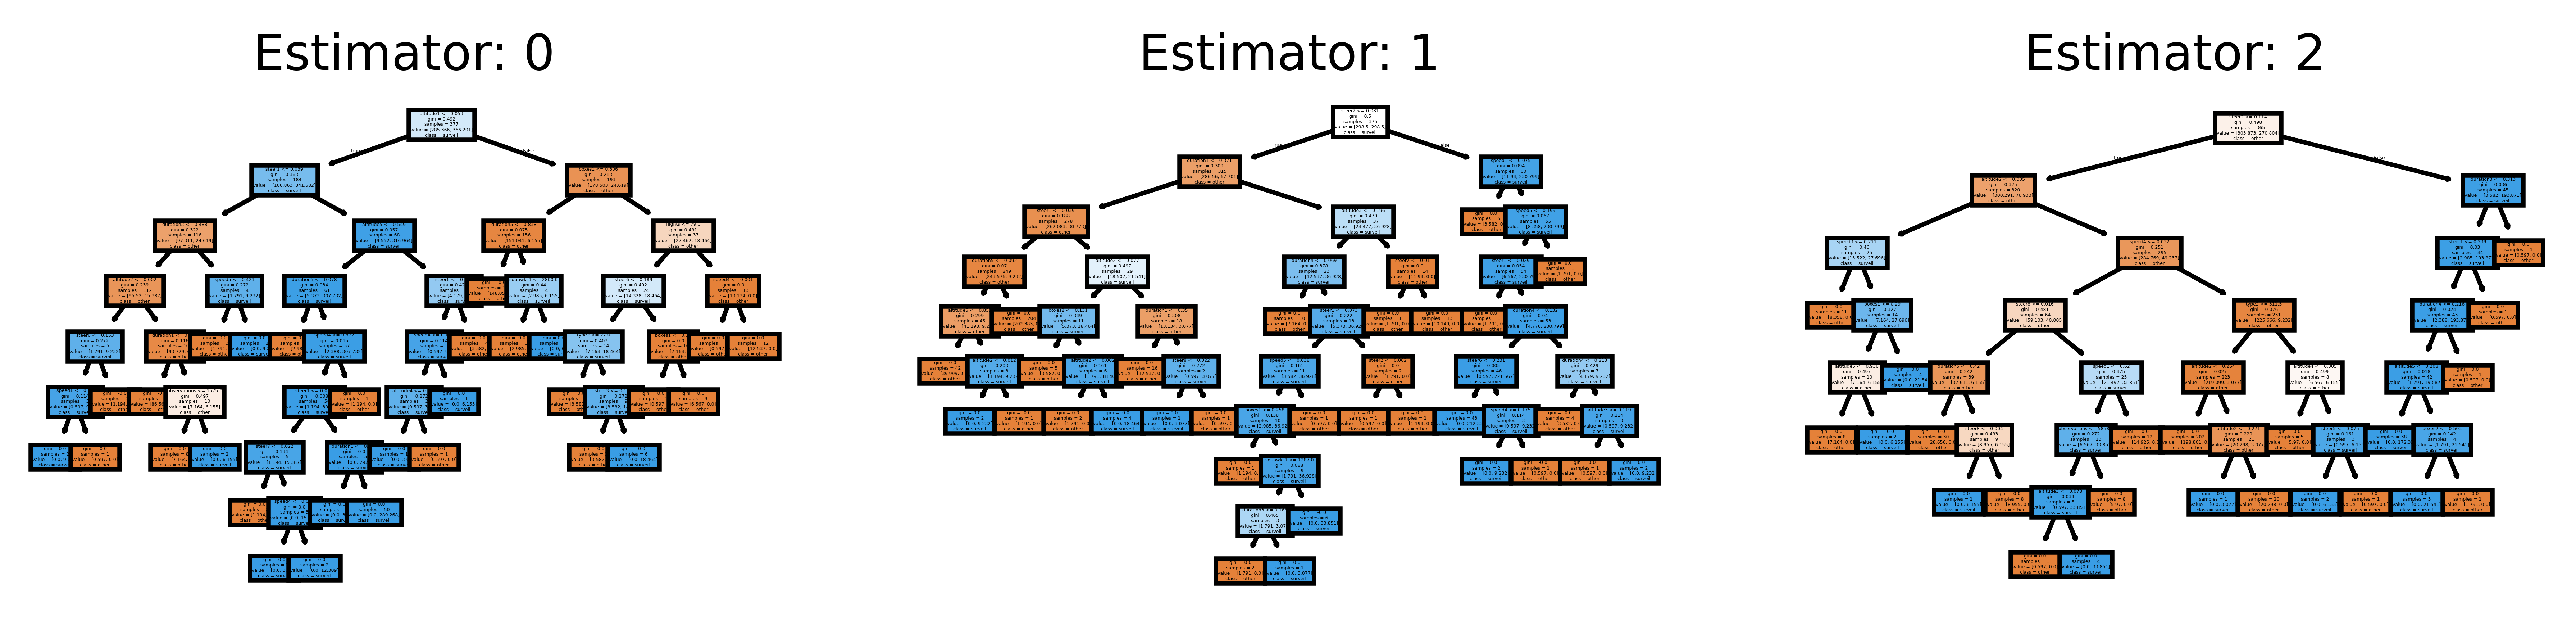

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(rf_model.estimators_[index],
                   feature_names = features, 
                   class_names = rf_model.classes_.astype(str),
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [21]:
# This just saves them
fig.savefig('rf_trees.png')

## Making New Predictions

In [22]:
# Load known federal planes data
feds = pd.read_csv("../2017-08-spy-plane-finder/data/feds.csv")

In [23]:
# Create dataset to classify (planes not in train or feds)
classify = planes[~planes['adshex'].isin(train['adshex']) & ~planes['adshex'].isin(feds['adshex'])]

In [24]:
classify.head()

,adshex,duration1,duration2,duration3,duration4,duration5,boxes1,boxes2,boxes3,boxes4,...,steer4,steer5,steer6,steer7,steer8,flights,squawk_1,observations,type,type2
0,A,0.120253,0.075949,0.183544,0.335443,0.284810,0.088608,0.044304,0.069620,0.120253,...,0.344090,0.097317,0.186651,0.011379,0.009426,158,0,11776,GRND,0
1,A00000,0.211735,0.155612,0.181122,0.198980,0.252551,0.204082,0.183673,0.168367,0.173469,...,0.356314,0.116116,0.159325,0.012828,0.013628,392,0,52465,TBM7,1
3,A00008,0.125000,0.041667,0.208333,0.166667,0.458333,0.125000,0.083333,0.125000,0.166667,...,0.380515,0.094669,0.182904,0.014706,0.020221,24,0,2176,PA46,3
4,A0001E,0.100000,0.200000,0.200000,0.400000,0.100000,0.100000,0.000000,0.100000,0.400000,...,0.326984,0.112698,0.206349,0.012698,0.011111,10,1135,630,C56X,4
5,A0002B,0.166667,0.166667,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,0.666667,...,0.416139,0.112342,0.169304,0.001582,0.001582,6,2356,632,C82S,5


In [25]:
classify.shape

(19160, 34)

In [26]:
# Run the random forest model on this dataset
predictions = rf_model.predict(classify[features])

In [27]:
# Create a DataFrame with predictions
classified = pd.DataFrame({'adshex': classify['adshex'], 'class': predictions})

In [28]:
classified.head()

,adshex,class
0,A,other
1,A00000,other
3,A00008,other
4,A0001E,other
5,A0002B,other


In [29]:
classified.groupby("class").count()

,adshex
class,
other,19074
surveil,86


## Your Turn

The next step in the process was to run the Random Forest model again, but to get probabilities.

With Python you don't actually have to re-run the model. There is a function on the object to get it.

1) What is it?
2) Can you implement it?
3) What plane not in the training set has the highest probability of being a surveillance plane?

Hint: Here is [the documentation](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for RandomForestClassifier.

The answer should be adshex **A7D925**. According to the `candidates_annotated.csv` it's a plane owned by local law enforcement in Orange County, CA.

In [30]:
probabilities = rf_model.predict_proba(classify[features])

In [31]:
probabilities

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.7, 0.3],
       [0.9, 0.1]])

In [32]:
classified_probs = pd.DataFrame({'adshex': classify['adshex'], 'prob_other': probabilities[:, 0], 'prob_surveil': probabilities[:, 1]})

In [33]:
classified_probs

,adshex,prob_other,prob_surveil
0,A,1.0,0.0
1,A00000,1.0,0.0
3,A00008,1.0,0.0
4,A0001E,1.0,0.0
5,A0002B,0.8,0.2
...,...,...,...
19794,ADFFFA,1.0,0.0
19795,ADFFFC,1.0,0.0
19796,ADFFFF,0.8,0.2
19797,AE1899,0.7,0.3


In [34]:
classified_probs.sort_values('prob_surveil', ascending=False)

,adshex,prob_other,prob_surveil
12036,A7D925,0.0,1.0
9889,A63E52,0.1,0.9
15855,AAE0FB,0.1,0.9
11130,A7166F,0.1,0.9
8102,A4FB3C,0.1,0.9
...,...,...,...
7764,A4D4DD,1.0,0.0
7766,A4D4EB,1.0,0.0
7767,A4D508,1.0,0.0
7768,A4D52C,1.0,0.0


---

---

---